### Статистический анализ данных

**Описание проекта:** Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. **без подписки**:
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
2. **с подпиской Ultra**:
- абонентская плата — 199 рублей в месяц:
- стоимость одной минуты поездки — 6 рублей;

**Цель проекта:** Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Описание данных:**
В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — **users_go.csv**:
- user_id -	уникальный идентификатор пользователя
- name - имя пользователя
- age -	возраст
- city - город
- subscription_type - тип подписки (free, ultra)

Поездки — **rides_go.csv**:
- user_id -	уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки

Подписки — **subscriptions_go.csv**:
- subscription_type - тип подписки
- minute_price  - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа

**План работы:**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Распределения

In [1]:
#импортируем необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt  
import numpy as np
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns

#### Шаг 1. Загрузка данных

In [2]:
# функция дло открытия файлов и последующая проверка правильности выполнения
def open_csv(file_path_platform, file_path_loc):
    try:
        name = pd.read_csv(file_path_platform)
    except:
    
        try:
            name = pd.read_csv(file_path_loc)
        except :
            name = None  

    if name is None:
        print('Что-то не так')
    else:
        print('Данные успешно загружены')
        print('*' * 40)
        print('Вывожу первые 10 сторк датафрейма:')
        display(name.head(10))
        print('*' * 40)
        print('Вывожу основную информацию о датафрейме:')
        name.info()
    return name       

In [3]:
users_go = open_csv('/datasets/users_go.csv', '/Users/sergey/Downloads/users_go.csv')

Данные успешно загружены
****************************************
Вывожу первые 10 сторк датафрейма:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


****************************************
Вывожу основную информацию о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В датасете содержится 1565 строк и 5 столбцов, в названии столбцов ошибок нет, пропуски отсутствуют, тип данных указан верно.

In [4]:
riders_go = open_csv('/datasets/rides_go.csv', '/Users/sergey/Downloads/rides_go.csv')

Данные успешно загружены
****************************************
Вывожу первые 10 сторк датафрейма:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


****************************************
Вывожу основную информацию о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В датасете содержится 18068 строк и 4 столбца, в названия столбцов замечаний нет, пропуски отсутствуют, в столбце date нужно изменить тип данных.

In [5]:
subscriptions_go = open_csv('/datasets/subscriptions_go.csv', '/Users/sergey/Downloads/subscriptions_go.csv')

Данные успешно загружены
****************************************
Вывожу первые 10 сторк датафрейма:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


****************************************
Вывожу основную информацию о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Датафрейм содержит 2 строки и 4 столбца, в названиях столцов ошибок нет, пропуски отсутствуют, тип данных указан верно.

#### Шаг 2. Предобработка данных

**Приведем столбец date в датафрейме riders_go к типу даты pandas**

In [6]:
riders_go['date'] = pd.to_datetime(riders_go['date'], format='%Y-%m-%d')

In [7]:
riders_go.dtypes  # проверим изенение типа данных

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

Все типы данных соответствуют.

**Добавим новый стоблец month_publication в таблицу riders_go**

In [8]:
riders_go['month'] = pd.DatetimeIndex(riders_go['date']).month # месяц публикации

In [9]:
riders_go.head() # выведем новую таблицу

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Проверим наличие пропусков во всех датасетах**

In [10]:
users_go.isna().sum() # проверим пропущенные значения в датасете users_go

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
riders_go.isna().sum() # проверим пропущенные значения в датасете risers_go

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [12]:
subscriptions_go.isna().sum() # проверим пропущенные значения в датасете subscriptions_go

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропуски отсутствуют во всех трех датасетах

**Выполним проверку на поиск явных дубликатов**

In [13]:
users_go.duplicated().sum() # проверяем явные дубликаты

31

Обнаружили 31 явный дубликат.

In [14]:
users_go = users_go.drop_duplicates()  # удаляем из датафрейма все дублирующиеся строки

In [15]:
users_go.duplicated().sum() # проверяем явные дубликаты

0

In [16]:
riders_go.duplicated().sum() # проверяем явные дубликаты

0

In [17]:
subscriptions_go.duplicated().sum() # проверяем явные дубликаты

0

Во всех датафреймах теперь отсутствуют явные дубликаты.

### Вывод:
В результате проведения предобработки данных не было обнаружено пропусков в данных, все типы данных приведенны в нужный вид и удалили явные дубликаты.

#### Шаг 3. Исследовательский анализ данных

Частота встречаемости городов

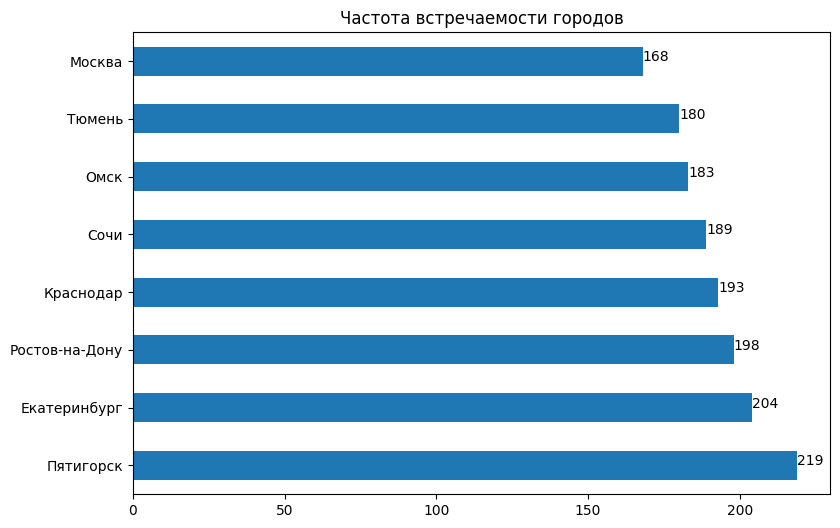

In [18]:
plt.subplots(figsize=(9,6))
users_go['city'].value_counts(ascending=False).plot.barh( title='Частота встречаемости городов');
for i in range(len(users_go['city'].value_counts())):
   plt.text(users_go['city'].value_counts()[i], i, users_go['city'].value_counts()[i])
plt.show()

Чаще всего встречается город Пятигорск - 219 раз, а реже всего Москва - 168.

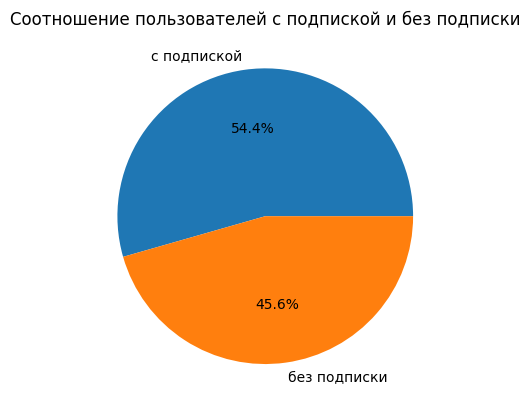

In [19]:
# построим круговую диаграмму, соотношения пользователей с подпиской и без нее
(users_go['subscription_type'].value_counts()
 .plot(ylabel='' ,kind='pie', 
      title='Cоотношение пользователей с подпиской и без подписки', 
      labels=('с подпиской','без подписки'), autopct='%1.1f%%'));

Количество пользователей с подпиской составляет: 54.43%, без подписки: 45.57%

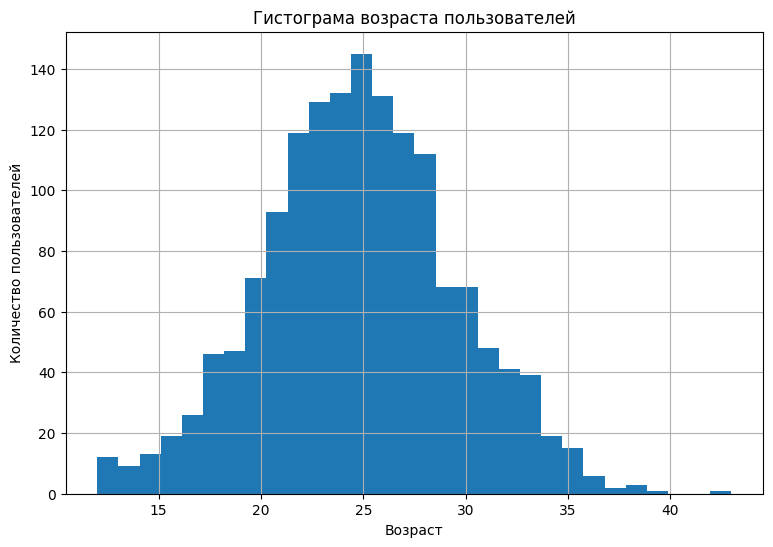

In [20]:
# Строим гистограмму возраста пользователей
users_go['age'].hist(bins=30, figsize=(9,6));
plt.title('Гистограма возраста пользователей');
plt.xlabel('Возраст');
plt.ylabel('Количество пользователей');

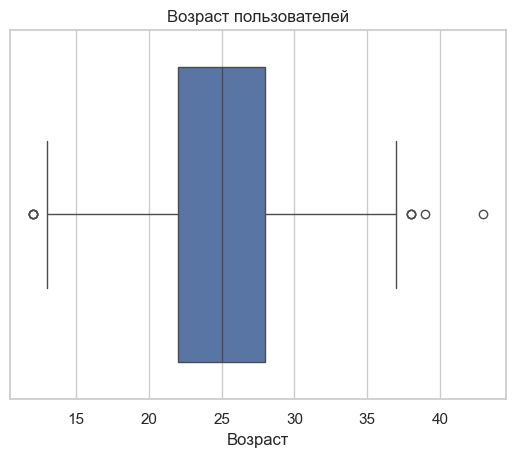

In [21]:
# Построим диаграмму размаха для данных возраста пользователей
sns.set(style="whitegrid")
sns.boxplot(x =users_go['age'])
plt.title('Возраст пользователей')
plt.xlabel('Возраст');
plt.show()

In [22]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Пиковое значение приходится на 25 лет. Низкий спрос у пользователей до 20 лет и после 30. На диаграмме размаха видно, что самый молодой пользователь - 12, а самый взрослый - 43 лет. Минимальное и медианное значение практически совпадают. Это означает, что данные распределенны нормально.  Видно, что есть пользователи моложе 18 лет.

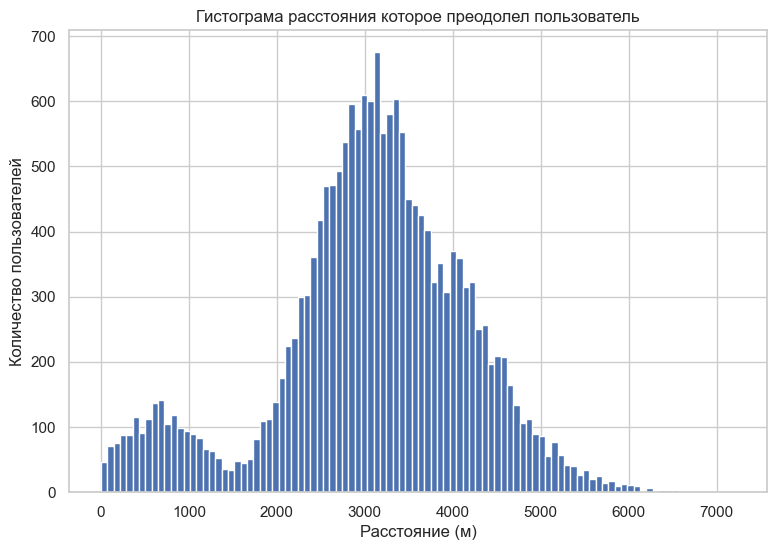

In [23]:
# Строим гистограмму расстояний которое преодолевает пользователь за одну поездку
riders_go['distance'].hist(bins=100, figsize=(9,6));
plt.title('Гистограма расстояния которое преодолел пользователь');
plt.xlabel('Расстояние (м)');
plt.ylabel('Количество пользователей');

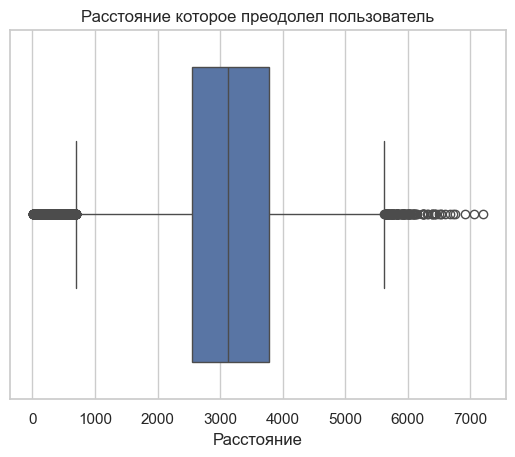

In [24]:
# Строим диаграмму размаха для расстояния которое преодолел пользователь
sns.set(style="whitegrid")
sns.boxplot(x =riders_go['distance'])
plt.title('Расстояние которое преодолел пользователь')
plt.xlabel('Расстояние');
plt.show()

In [25]:
riders_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [26]:
riders_go.loc[riders_go['distance'] < 1000].head(30)  # Выведем данные у которых дальность поездки менее 1000 метров

,user_id,distance,duration,date,month
2,1,754.159807,6.232113,2021-04-20,4
9,1,748.690645,15.041884,2021-11-22,11
20,2,923.007439,6.914760,2021-08-03,8
47,4,724.559572,11.811399,2021-11-14,11
91,9,979.657684,17.521497,2021-03-08,3
100,10,680.952663,5.150377,2021-02-21,2
149,15,634.891669,15.809350,2021-04-05,4
153,15,671.851433,12.031109,2021-11-15,11
154,16,850.321732,13.125804,2021-02-18,2
172,18,850.211768,6.400847,2021-04-09,4


На гистограмме видно два распределениея - короткие и длинные поездки. Первый пик приходится на 500 метров. Глядя на поездки до 1000 метров, можно сказать, что большинство из них приходится не на летний созон. Значит есть вероятность, что короткие поездки связанны с погодными условиями. Так же есть вероятность, что у пользователся не получилось управлять самокатом, либо самокат технически не исправен. Второе пиковое значение на графике находится на расстоянии приемерно 3100 метров. Аномальные значения отсутствуют. Самая длительная поездка составляет 7211 метров.

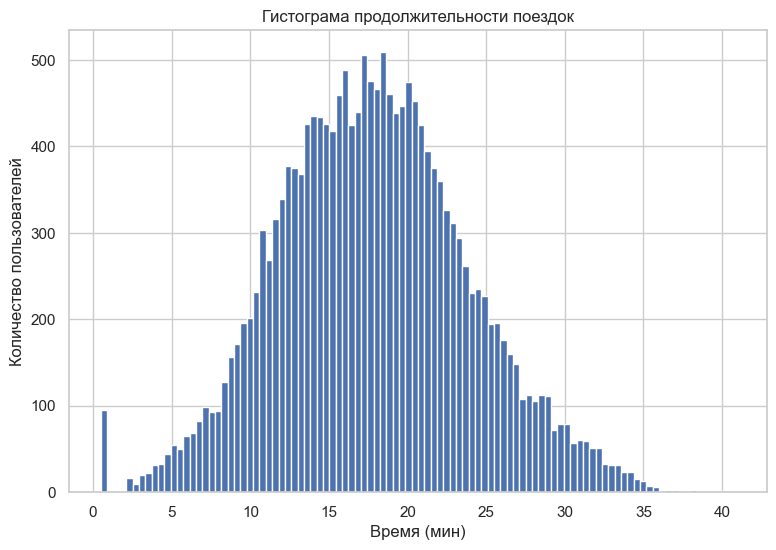

In [27]:
riders_go['duration'].hist(bins=100, figsize=(9,6))
plt.title('Гистограма продолжительности поездок');
plt.xlabel('Время (мин)');
plt.ylabel('Количество пользователей');

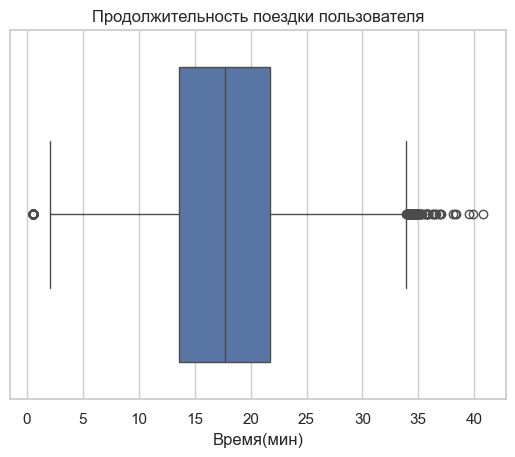

In [28]:
# Строим диаграмму размаха для продолжительности поездки пользоватея.
sns.set(style="whitegrid")
sns.boxplot(x =riders_go['duration'])
plt.title('Продолжительность поездки пользователя')
plt.xlabel('Время(мин)');
plt.show()

In [29]:
riders_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [30]:
riders_go[riders_go['duration'] < 5].head(30)  # Выведем данные время поездки у которых менее 5 минут

,user_id,distance,duration,date,month
280,29,824.495470,4.832212,2021-11-21,11
406,44,504.654111,4.513962,2021-01-25,1
1450,157,935.054928,4.934596,2021-10-03,10
1843,199,606.203843,4.347120,2021-03-27,3
2125,227,618.389251,4.855168,2021-06-22,6
2174,232,573.376564,4.228664,2021-06-30,6
3158,340,419.074576,4.323393,2021-11-08,11
4148,448,529.588380,4.444332,2021-06-25,6
5782,616,381.179906,4.633628,2021-07-02,7
5952,635,266.123499,3.760353,2021-12-23,12


Исходя из графика, видно, что большинство поездок длятся 17 минут. Также виден пик слишком малых значений, 1-2 минуту. Глядя на поездки длинной менее 5 минут, наше предположение сходится, что эти поездки приходятся на зимний, весенний и осенний период. В такое время года может быть не комфортно передвигаться на самокате, либо могут возникнуть трудности при управлении транспортным средством.

### Вывод:
В ходе проведения исследовательского анализа данных, мы получили, что:
- Наибольшее количество поездок было совершено в городах Пятигорск и Екатеринбург, в то время как наименьшее количество поездок было зарегистрировано в Тюмени и Москве.
- Количество пользователей с подпиской превышает количество пользователей без подписки на 8%, что может свидетельствовать о привлекательности условий подписки для пользователей.
- Возраст большинства пользователей 25 лет, до 18 лет намного меньше пользователей, а после 35 сводится к нулю.
- Чаще всего пользователи преодолевают расстояние в 3100 метров за одну поезду. Расстояние свыше 6000 метров преодолевают редко, что может быть связано с ограничениями по дальности хода самокатов. Наличие малых значений может указывать на возможные трудности пользователей с управлением самокатами.
- Продолжительность поездок  длится 15-20 минут, это сходится с нашим выводом о поездках в 3100 метров. Так же видны очень короткие поездки, которые так же могут говорить, об трудностях пользователей с управлением самоката.

#### Шаг 4. Объединение данных

In [31]:
# Объединим таблицу users_go и riders_go, по столбцу user_id 
data_user = users_go.merge(riders_go, on='user_id')
#  Объединим таблицу data_user и subscriptions_go, по столбцу subscription_type
data = data_user.merge(subscriptions_go, on='subscription_type')
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [33]:
data.duplicated().sum()

0

После объединения трех таблиц методом merge. Получили новый датафрейм data. Он содержит 18068 строк, что сходится с количеством строк в таблице riders_go. Пропусков нет, дубликаты отсутствуют.

In [34]:
# Создадим новую таблицу где находятся пользователи с подпиской
subscription_ultra = data.query("subscription_type == 'ultra'")
subscription_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [35]:
# Создадим новую таблицу где находятся пользователи без подписки
subscription_free = data.query("subscription_type == 'free'")
subscription_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [36]:
subscription_ultra.shape[0]  # количество поездкок пользователей с подпиской

6500

In [37]:
subscription_free.shape[0]   # количество поездок пользователей без подписки

11568

In [38]:
if len(data) == (len(subscription_free) + len(subscription_ultra)):
    print('Разделение прошло успешно')
else:
    print('Ошибка')

Разделение прошло успешно


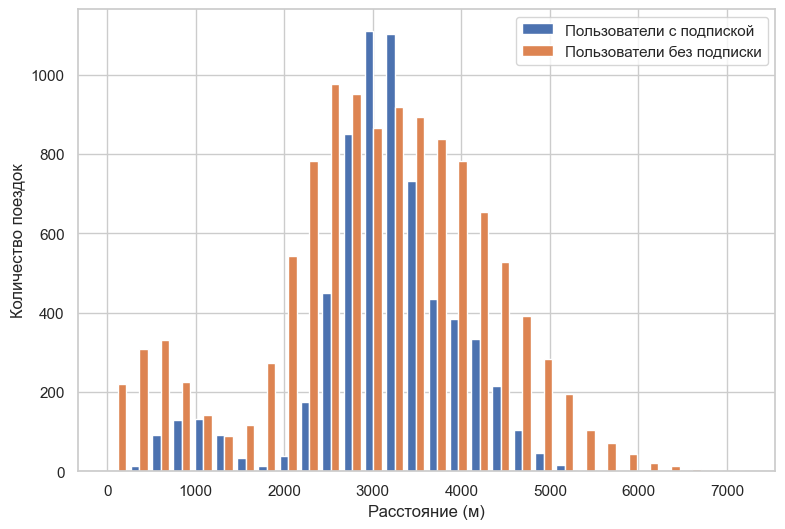

In [39]:
# Визуализирую информацию о расстоянии для пользователей обеих категорий.
plt.figure(figsize=(9, 6))
plt.hist([subscription_ultra['distance'], subscription_free['distance']], 
         bins=30, label=['Пользователи с подпиской', 'Пользователи без подписки'])
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.legend();

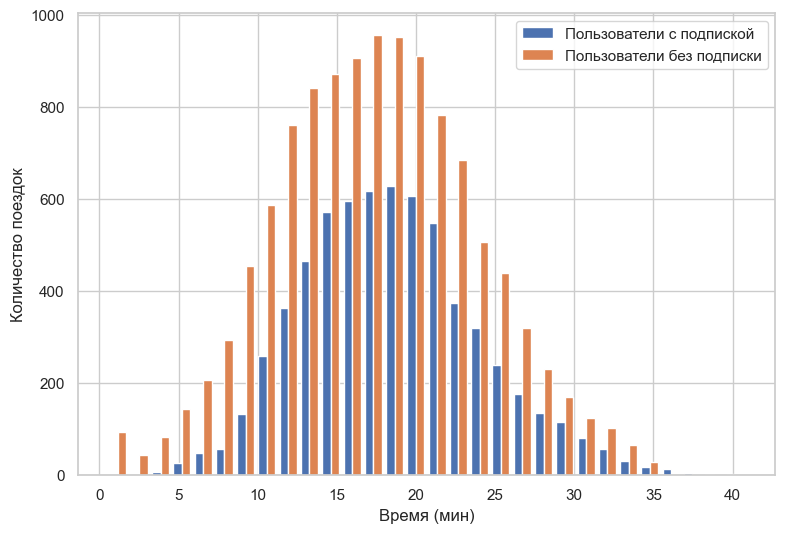

In [40]:
# Визуализирую информацию о времени поездок для пользователей обеих категорий.
plt.figure(figsize=(9, 6))
plt.hist([subscription_ultra['duration'], subscription_free['duration']],
         bins=30, label=['Пользователи с подпиской', 'Пользователи без подписки'])
plt.xlabel('Время (мин)')
plt.ylabel('Количество поездок')
plt.legend();

### Вывод:
Пользователи без подписки чаще совершают короткие поездки до 1000 метров и поездки длиной более 3500 метров. Пиковое значение протяженности поездки для данной категории пользователей приходится на диапазон 2400-2600 метров. В то же время у пользователей с подпиской пик продолжительности поездок приходится на диапазон 3000-3200 метров, и они реже совершают дальние поездки.

Длительность поездок у пользователей с подпиской обычно меньше, что может быть обусловлено их опытом и регулярным перемещением по одному и тому же маршруту. В то время как у пользователей без подписки присутствуют поездки длительностью менее 5 минут, что может указывать на возможные трудности у новых пользователей с управлением самоката.

#### Шаг 5. Подсчёт выручки

In [41]:
# Каждое значение из столбца 'duration' округляется с помощью «потолка»
data['duration'] = np.ceil(data['duration']) 

In [42]:
# Создадим датафрейм с агрегированными данными о поездках. Суммарное расстояние, количество поездок и суммарное время 
pivot_revenue = data.pivot_table(index=['user_id', 'month'], 
                                 values=['distance', 'duration', 'subscription_type', 'subscription_fee',
                                        'minute_price', 'start_ride_price'],
                                 aggfunc={'distance':  'sum', 
                                          'duration': ('count', 'sum'),
                                          'subscription_type': 'min', 
                                          'subscription_fee': 'first',
                                          'minute_price': 'first',
                                          'start_ride_price': 'first'
                                 }
                                )
                                    
pivot_revenue.columns = ['distance', 
                         'count', 
                         'duration', 
                         'minute_price',
                         'start_ride_price', 
                         'subscription_fee',
                         'subscription_type'
                        ]
pivot_revenue.head(20)

distance  count  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1       7027.511294      2      42.0             6                 0   
        4        754.159807      1       7.0             6                 0   
        8       6723.470560      2      46.0             6                 0   
        10      5809.911100      2      32.0             6                 0   
        11      7003.499363      3      56.0             6                 0   
        12      6751.629942      2      28.0             6                 0   
2       3      10187.723006      3      63.0             6                 0   
        4       6164.381824      2      40.0             6                 0   
        6       3255.338202      1      14.0             6                 0   
        7       6780.722964      2      48.0             6                 0   
        8        923.007439      1       7.0             6                 0   
        10      2824.636598      1      19.0             6                 0   
        12      3828.248580      1      12.0             6                 0   
3       1       3061.777147      1      13.0             6                 0   
        2       5421.152016      2      39.0             6                 0   
        4       2956.651632      1      21.0             6                 0   
        5       9064.026918      3      63.0             6                 0   
        7      10919.595403      3      67.0             6                 0   
        9       2891.012822      1      23.0             6                 0   
        12      2593.381928      1      13.0             6                 0   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra  
        12                  199             ultra  
2       3                   199             ultra  
        4                   199             ultra  
        6                   199             ultra  
        7                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        12                  199             ultra  
3       1                   199             ultra  
        2                   199             ultra  
        4                   199             ultra  
        5                   199             ultra  
        7                   199             ultra  
        9                   199             ultra  
        12                  199             ultra

In [43]:
pivot_revenue.isna().mean()  # проверим агрегированный датафрейм на пропуски

distance             0.0
count                0.0
duration             0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
subscription_type    0.0
dtype: float64

Пропуски отсутствуют

In [44]:
# Напишем функцию для добавления нового столбца total , с подсчетом помесячной выручки каждого пользователя
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return row['minute_price'] * row['duration'] + row['subscription_fee']
    elif row['subscription_type'] == 'free':
        return row['start_ride_price'] * row['count'] + (row['minute_price'] * row['duration'])

In [45]:
# Применяем написанную функцию
pivot_revenue['total'] = pivot_revenue.apply(revenue, axis=1)
pivot_revenue = pivot_revenue.reset_index()
pivot_revenue

,user_id,month,distance,count,duration,minute_price,start_ride_price,subscription_fee,subscription_type,total
0,1,1,7027.511294,2,42.0,6,0,199,ultra,451.0
1,1,4,754.159807,1,7.0,6,0,199,ultra,241.0
2,1,8,6723.470560,2,46.0,6,0,199,ultra,475.0
3,1,10,5809.911100,2,32.0,6,0,199,ultra,391.0
4,1,11,7003.499363,3,56.0,6,0,199,ultra,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,2,26.0,8,50,0,free,308.0
11327,1534,8,7622.453034,2,48.0,8,50,0,free,484.0
11328,1534,9,4928.173852,1,23.0,8,50,0,free,234.0
11329,1534,11,13350.015305,4,78.0,8,50,0,free,824.0


### Вывод:
В ходе выполнения анализа, мы создали новый датафрейм, где посчитали суммарное количество поездок, расстояние и время, для каждого пользователя в определенный месяц. Так же посчитали доход, который принес каждый пользователь в определенный месяц.

#### Шаг 6. Проверка гипотез

#### 6.1 Тратят ли пользователи с подпиской больше времени на поездки? 

Нулевая гипотеза: средние значения затраченного времени пользователей из двух групп равны.

Альтернативная гипотеза: среднее значение затраченного времени пользователей с подпиской больше, чем среднее значение затраченного времени пользователей без подписки

In [46]:
alpha = 0.05 # уровень статистической значимости

# Проведем ttest для двух независимых выборок
results = st.ttest_ind(subscription_ultra['duration'], subscription_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

print('Среднее первой выборки', np.mean(subscription_ultra['duration']))
print('Среднее второй выборки', np.mean(subscription_free['duration']))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Среднее первой выборки 18.54198516280583
Среднее второй выборки 17.39090929866399
Отвергаем нулевую гипотезу


Полученное значение p-value очень мало и намного меньше уровня статической значимостти, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской в среднем совершают более длительные поездки. Хотя на гистограмме этого не видно.

#### 6.2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Нулевая гипотеза: среднее расстояние которое проезжают пользователи с подпиской равно 3130 метров.

Альтернативная гипотеза: среднее расстояние пользователей с подпиской больше чем 3130 метров.

In [47]:
interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(
    subscription_ultra['distance'], interested_value, alternative='greater')
print('p-значение:', results.pvalue)

print('Среднее выборки', np.mean(subscription_ultra['distance']))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Среднее выборки 3115.4453880370247
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value= 92% - это больше чем уровень статической значимости, поэтому не получается опровергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской  совершают поездки длинной 3130 метров.

#### 6.3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Нулевая гипотеза: помесячная выручка от пользователей с подписой  равна выручке от пользователей без подписки.

Альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

In [48]:
ultra_per_mnth = pivot_revenue.loc[pivot_revenue['subscription_type'] == 'ultra', 'total']

free_per_mnth = pivot_revenue.loc[pivot_revenue['subscription_type']== 'free', 'total']


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

print('Среднее первой выборки', np.mean(ultra_per_mnth))
print('Среднее второй выборки', np.mean(free_per_mnth))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Среднее первой выборки 362.7921906022502
Среднее второй выборки 328.6413651073845
Отвергаем нулевую гипотезу


Полученное значение p-value меньше чем уровень статической значимости, поэтому отвергаем нулевую гипотезу. Есть основания говорить, что выручка от пользователей с подпиской больше.

#### 6.4 техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось.  Какой тест вам понадобился бы для проверки этой гипотезы?
Для того, что бы проверить гипотезу об изменении количества обращений в техподдержку, после обновления сервера, необходимо воспользоваться методом **spicy.stats.ttest_rel" == "st.ttest_rel**. В роли аргументов нужно предоставить две выборки: **до обновления** и **после обновления** сервера. 

Например имея две выборки **before** и **after** и установив уровень статстической значимости в 5%, то пример кода будет выглядеть таким образом:

results = st.ttest_rel(before, after)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:

    print('Отвергаем нулевую гипотезу о равенстве среднего веса посылок')
    
else:

    print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего веса посылок')

### Вывод:
При проверке гипотез, мы установили, что:
- Есть основания говорить, что пользователи с подпиской в среднем совершают более длительные поездки.
- Есть основания говорить, что пользователи с подпиской в стреднем совершают поездки длинной 3130 метров.
- Есть основания говорить, что выручка от пользователей с подпиской больше.

#### Шаг 7. Распределения

**Задача 1.** Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.


In [49]:
import scipy.stats as st

p = 0.1  # вероятность успеха
k = 99  # количество успехов
probability = 0.05

for n in range(1000, 10000):  # предположим, что попытки ограничены от 1000 до 10000
     
    distr = st.binom(n, p)  # задаем биномиальное распределение
    result = distr.cdf(k)  # инициализация переменной result

    if result <= probability:
        break

print(f'При n={n}, вероятность не выполнить план будет равна {result.round(2)*100}%')

При n=1161, вероятность не выполнить план будет равна 5.0%


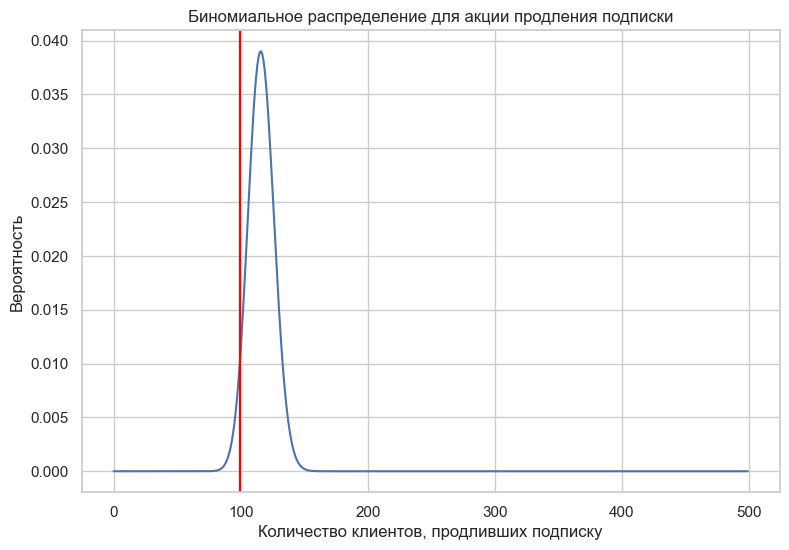

In [50]:
x = range(0, 500)  # зададим ось x
y = st.binom.pmf(x, n, p)  # зададим ось y
plt.figure(figsize=(9, 6))
plt.plot(x, y)  # строим график
plt.axvline(x=k, color='red')  # указываем математическое ожидание
plt.xlabel('Количество клиентов, продливших подписку')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение для акции продления подписки')
plt.show()


### Вывод:
Для того, что бы после бесплатного пробного периода, минимум 100 клиентов продлили эту подписку,отделу маркетинга GoFast необходимо разослать 1158 промокодов. При таком количестве промокодов вероятность не выполнить план будет 5%.

**Задача 2.** Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 
40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [51]:
n = 1000000  # количество попыток
k = 399500  # количество успехов
p = 0.4  # вероятность успеха
mu = n * p  # математическое ожидание
sigma = (n * p * (1 - p))**0.5  # корень из стандартного отклонения
distr = st.norm(mu, sigma)  # задаем нормальное распределение
result = distr.cdf(k)  # инициализация переменной result
print(f'Вероятность, что из 1млн. уведомлений - откроют не более 399.5 пользователей равна {result.round(2)*100}%')

Вероятность, что из 1млн. уведомлений - откроют не более 399.5 пользователей равна 15.0%


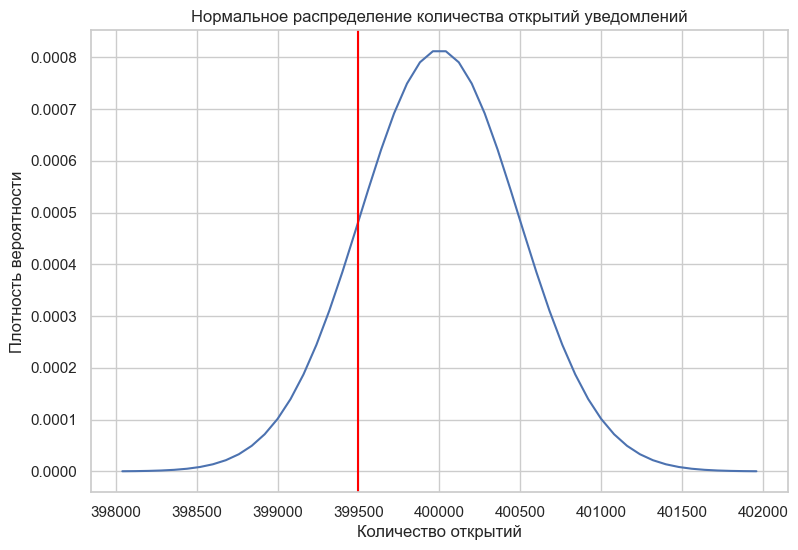

In [52]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma)  # зададим ось x
y = st.norm.pdf(x, mu, sigma)  # зададим ось y
plt.figure(figsize=(9, 6))
plt.plot(x, y)  # строим график
plt.axvline(x=k, color='red')  # указываем необходимое число успехов
plt.title('Нормальное распределение количества открытий уведомлений')
plt.xlabel('Количество открытий')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.show()

### Вывод:
При отправке отделом маркетинга клиентам push-уведомления в мобильном приложении в количестве 1млн. штук, вероятность, что их откроет не более 399.5 тыс. пользователей равна 15%, при условиии, что вероятность открытия уведомлений 40%.

### Общий вывод:
В ходе выполнения анализа данных, мы:
1. Загрузили 3 датасета: "users_go", "riders_go" и "subscriptions_go".
2. Выполнили предобработку данных, в результате - не было обнаружено пропусков в данных. В датафрейме riders_go столбец date привели к типу даты pandas. Удалили явные дубликаты в users_go - 31.
3. При проведения исследовательского анализа данных,получили, что:
- Наибольшее количество поездок было совершено в городах Пятигорск и Екатеринбург, в то время как наименьшее количество поездок было зарегистрировано в Тюмени и Москве.
- Количество пользователей с подпиской превышает количество пользователей без подписки на 8%, что может свидетельствовать о привлекательности условий подписки для пользователей.
- Возраст большинства пользователей 25 лет, до 18 лет намного меньше пользователей, а после 35 сводится к нулю.
- Чаще всего пользователи преодолевают расстояние в 3100 метров за одну поезду. Расстояние свыше 6000 метров преодолевают редко, что может быть связано с ограничениями по дальности хода самокатов. Наличие малых значений может указывать на возможные трудности пользователей с управлением самокатами.
- Продолжительность поездок длится 15-20 минут, это сходится с нашим выводом о поездках в 3100 метров. Так же видны очень короткие поездки, которые так же могут говорить, об трудностях пользователей с управлением самоката.
4. Собрали 3 таблицы в одну data. И на основе этой таблицы создали 2 новых. Где разделили пользователей с разными типами подписки.  Исходя их полученных данных выяснили, что:
- пользователи без подписки чаще совершают короткие поездки до 1000 метров и поездки длиной более 3500 метров. Пиковое значение протяженности поездки для данной категории пользователей приходится на диапазон 2400-2600 метров. В то же время у пользователей с подпиской пик продолжительности поездок приходится на диапазон 3000-3200 метров, и они реже совершают дальние поездки.
- длительность поездок у пользователей с подпиской обычно меньше, что может быть обусловлено их опытом и регулярным перемещением по одному и тому же маршруту. В то время как у пользователей без подписки присутствуют поездки длительностью менее 5 минут, что может указывать на возможные трудности у новых пользователей с управлением самоката.
5. В ходе выполнения анализа, мы создали новый датафрейм, где посчитали суммарное количество поездок, расстояние и время, для каждого пользователя в определенный месяц. Так же посчитали доход, который принес каждый пользователь в определенный месяц.
6. При проверке гипотез, мы установили, что:
- есть основания говорить, что пользователи с подпиской в среднем совершают более длительные поездки.
- есть основания говорить, что пользователи с подпиской в стреднем совершают поездки длинной 3130 метров.
- есть основания говорить, что выручка от пользователей с подпиской больше.
7. Распределения:
- для того, что бы после бесплатного пробного периода, минимум 100 клиентов продлили эту подписку,отделу маркетинга GoFast необходимо разослать 1158 промокодов. При таком количестве промокодов вероятность не выполнить план будет 5%.
- при отправке отделом маркетинга клиентам push-уведомления в мобильном приложении в количестве 1млн. штук, вероятность, что их откроет не более 399.5 тыс. пользователей равна 15%, при условиии, что вероятность открытия уведомлений 40%.


Таким образом можно утверждать, что пользователи с подпиской более выгодны для сервиса GoFast. Значит необходимо привлекать больше пользователей с подпиской, создавая различныеу услоия и спец. предложения.